## import libraries

In [631]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## import data - csv file

In [632]:
df = pd.read_csv('basketball_players.csv').set_index('player_id')

In [633]:
df.groupby('league_id').size()

league_id
ABA     203
NBA    1406
dtype: int64

In [634]:
df = df[df['league_id'] == 'NBA']

## data structure

In [635]:
df.shape

(1406, 22)

In [636]:
df.columns

Index(['last_name', 'first_name', 'season_id', 'conference', 'league_id',
       'games_played', 'minutes', 'points', 'o_rebounds', 'd_rebounds',
       'rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'fg_attempted', 'fg_made', 'ft_attempted', 'ft_made',
       'three_attempted', 'three_made'],
      dtype='object')

In [637]:
df.sample(5)

,last_name,first_name,season_id,conference,league_id,games_played,minutes,points,o_rebounds,d_rebounds,...,steals,blocks,turnovers,personal_fouls,fg_attempted,fg_made,ft_attempted,ft_made,three_attempted,three_made
player_id,,,,,,,,,,,,,,,,,,,,,
mcadobo01,McAdoo,Bob,1973,East,NBA,1,13,11.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.0,8.0,5.0,NaN,NaN
dumarjo01,Dumars,Joe,1994,East,NBA,1,21,11.0,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,5.0,0.0,0.0,NaN,NaN
thomsda01,Thomspon,David,1982,West,NBA,1,17,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,5.0,0.0,0.0,NaN,NaN
sprewla01,Sprewell,Latrell,1994,West,NBA,1,22,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,4.0,1.0,1.0,NaN,NaN
roberal01,Robertson,Alvin,1986,West,NBA,1,16,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,2.0,2.0,2.0,NaN,NaN


In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1406 entries, abdulka01 to zasloma01
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_name        1406 non-null   object 
 1   first_name       1406 non-null   object 
 2   season_id        1406 non-null   int64  
 3   conference       1406 non-null   object 
 4   league_id        1406 non-null   object 
 5   games_played     1406 non-null   int64  
 6   minutes          1406 non-null   int64  
 7   points           1359 non-null   float64
 8   o_rebounds       337 non-null    float64
 9   d_rebounds       337 non-null    float64
 10  rebounds         1359 non-null   float64
 11  assists          1359 non-null   float64
 12  steals           337 non-null    float64
 13  blocks           337 non-null    float64
 14  turnovers        337 non-null    float64
 15  personal_fouls   337 non-null    float64
 16  fg_attempted     1359 non-null   float64
 17  fg_mad

In [639]:
df.dtypes

last_name           object
first_name          object
season_id            int64
conference          object
league_id           object
games_played         int64
minutes              int64
points             float64
o_rebounds         float64
d_rebounds         float64
rebounds           float64
assists            float64
steals             float64
blocks             float64
turnovers          float64
personal_fouls     float64
fg_attempted       float64
fg_made            float64
ft_attempted       float64
ft_made            float64
three_attempted    float64
three_made         float64
dtype: object

In [640]:
df.describe()

,season_id,games_played,minutes,points,o_rebounds,d_rebounds,rebounds,assists,steals,blocks,turnovers,personal_fouls,fg_attempted,fg_made,ft_attempted,ft_made,three_attempted,three_made
count,1406.000000,1406.0,1406.000000,1359.000000,337.000000,337.000000,1359.000000,1359.000000,337.000000,337.000000,337.000000,337.000000,1359.000000,1359.000000,1359.000000,1359.000000,337.000000,363.000000
mean,1980.118777,1.0,23.372688,10.686534,1.495549,3.026706,4.914643,2.551141,1.172107,0.424332,1.566766,1.252226,9.316409,4.314937,2.537160,1.838116,1.801187,0.586777
std,16.993806,0.0,16.017622,6.965857,1.605648,2.542941,3.974338,2.692131,1.279436,0.809763,1.410787,1.245899,4.906785,2.884524,2.842176,2.210962,2.355136,1.066849
min,1950.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1966.000000,1.0,16.000000,6.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1980.000000,1.0,21.000000,10.000000,1.000000,3.000000,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000,9.000000,4.000000,2.000000,1.000000,1.000000,0.000000
75%,1994.000000,1.0,27.000000,15.000000,2.000000,4.000000,7.000000,3.000000,2.000000,1.000000,2.000000,2.000000,12.000000,6.000000,4.000000,3.000000,3.000000,1.000000
max,2009.000000,1.0,99.000000,42.000000,7.000000,19.000000,27.000000,22.000000,5.000000,5.000000,7.000000,5.000000,27.000000,17.000000,16.000000,12.000000,11.000000,6.000000


## data reduction

In [641]:
(df.isna().sum() / df.shape[0]).round(2) * 100

last_name           0.0
first_name          0.0
season_id           0.0
conference          0.0
league_id           0.0
games_played        0.0
minutes             0.0
points              3.0
o_rebounds         76.0
d_rebounds         76.0
rebounds            3.0
assists             3.0
steals             76.0
blocks             76.0
turnovers          76.0
personal_fouls     76.0
fg_attempted        3.0
fg_made             3.0
ft_attempted        3.0
ft_made             3.0
three_attempted    76.0
three_made         74.0
dtype: float64

In [642]:
df.columns

Index(['last_name', 'first_name', 'season_id', 'conference', 'league_id',
       'games_played', 'minutes', 'points', 'o_rebounds', 'd_rebounds',
       'rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'fg_attempted', 'fg_made', 'ft_attempted', 'ft_made',
       'three_attempted', 'three_made'],
      dtype='object')

In [643]:
df = df.dropna(axis=1, thresh=len(df) * 0.7)

In [644]:
df.columns

Index(['last_name', 'first_name', 'season_id', 'conference', 'league_id',
       'games_played', 'minutes', 'points', 'rebounds', 'assists',
       'fg_attempted', 'fg_made', 'ft_attempted', 'ft_made'],
      dtype='object')

In [645]:
(df.isna().sum() / df.shape[0]).round(2) * 100

last_name       0.0
first_name      0.0
season_id       0.0
conference      0.0
league_id       0.0
games_played    0.0
minutes         0.0
points          3.0
rebounds        3.0
assists         3.0
fg_attempted    3.0
fg_made         3.0
ft_attempted    3.0
ft_made         3.0
dtype: float64

In [646]:
numeric_columns = df.select_dtypes(include='number').columns

df = df.fillna(df.median(numeric_only=True))

In [647]:
(df.isna().sum() / df.shape[0]).round(2) * 100

last_name       0.0
first_name      0.0
season_id       0.0
conference      0.0
league_id       0.0
games_played    0.0
minutes         0.0
points          0.0
rebounds        0.0
assists         0.0
fg_attempted    0.0
fg_made         0.0
ft_attempted    0.0
ft_made         0.0
dtype: float64

## data insight

<Axes: >

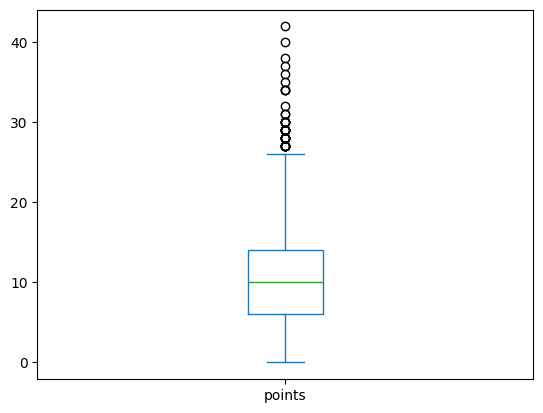

In [648]:
df.points.plot.box()

<Axes: >

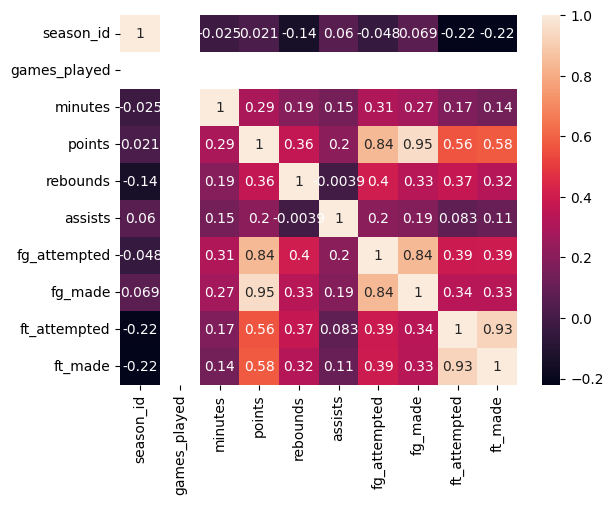

In [649]:
sns.heatmap(df[5:].corr(numeric_only=True), annot=True)

## data transformation

In [650]:
df_agg = df.groupby('player_id').agg({
    'games_played': 'sum',
    'minutes': 'mean',
    'points': 'mean',
    'rebounds': 'mean',
    'assists': 'mean',
    'fg_attempted': 'mean',
    'fg_made': 'mean',
    'ft_attempted': 'mean',
    'ft_made': 'mean',
})
df_agg.sort_values(by='games_played', ascending=False)

,games_played,minutes,points,rebounds,assists,fg_attempted,fg_made,ft_attempted,ft_made
player_id,,,,,,,,,
abdulka01,19,28.789474,13.736842,7.526316,2.789474,11.684211,5.736842,2.736842,2.210526
jordami01,14,34.357143,19.428571,4.642857,4.000000,17.285714,8.142857,3.857143,2.857143
johnsma01,14,34.571429,14.285714,5.071429,9.428571,11.214286,5.142857,3.714286,3.214286
chambwi01,13,29.846154,14.692308,15.153846,2.769231,9.384615,5.538462,7.230769,3.615385
cousybo01,13,28.307692,11.307692,5.769231,6.615385,12.153846,4.000000,3.923077,3.307692
...,...,...,...,...,...,...,...,...,...
masonan01,1,20.000000,0.000000,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000
mcdanxa01,1,13.000000,2.000000,2.000000,0.000000,9.000000,1.000000,0.000000,0.000000
mcdyean01,1,15.000000,8.000000,8.000000,2.000000,9.000000,4.000000,0.000000,0.000000


<Axes: xlabel='minutes', ylabel='points'>

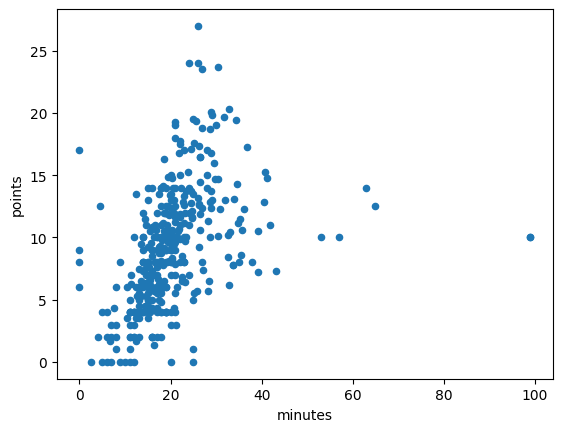

In [651]:
df_agg.plot.scatter('minutes', 'points')

<Axes: xlabel='rebounds', ylabel='points'>

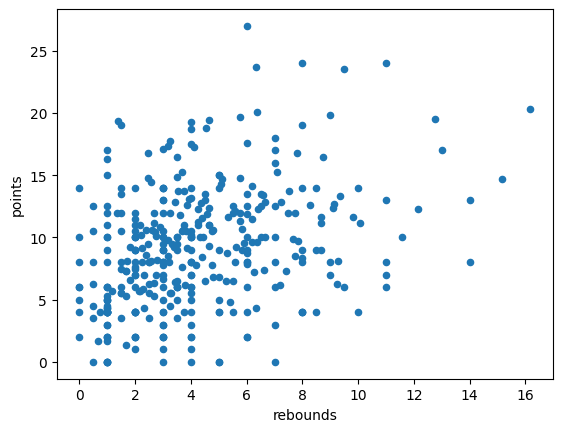

In [652]:
df_agg.plot.scatter('rebounds', 'points')

<Axes: >

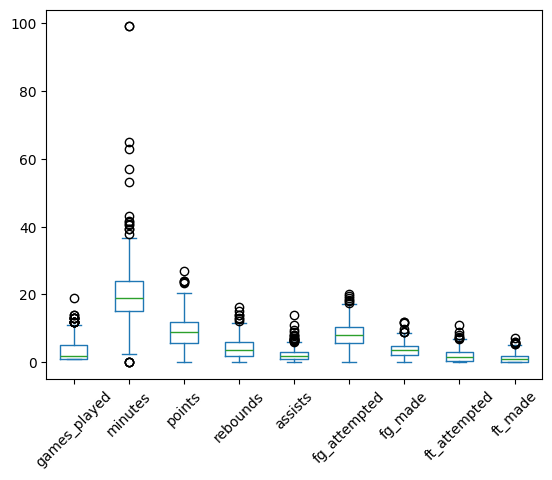

In [653]:
df_agg.plot.box(rot=45)

In [654]:
minmax = MinMaxScaler()

df_normalized = pd.DataFrame(minmax.fit_transform(df_agg), columns=df_agg.columns)

## K-Means

In [656]:
iner = list()

for k in range(1, 10):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(df_normalized)
  iner.append(km.inertia_)
  print(km.inertia_)

93.87091869463336
62.13326380084232
54.1007232473775
48.54758836389447
45.304928114223884
42.32818364380956
40.11628879791283
36.21590914654168
34.652975364903526


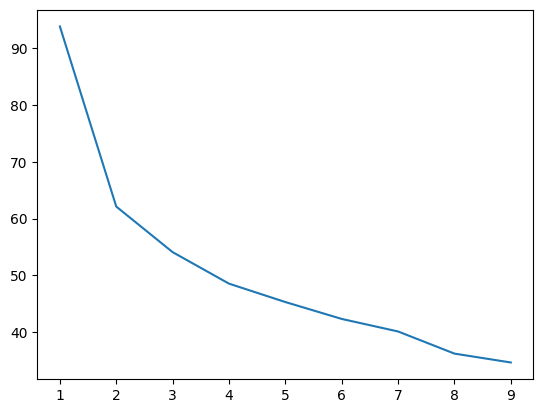

In [657]:
plt.plot(range(1,10), iner)

In [625]:
km = KMeans(n_clusters=3, random_state=42)
km

KMeans(n_clusters=3, random_state=42)

In [626]:
km.fit(df_normalized)

KMeans(n_clusters=3, random_state=42)

In [627]:
# labels = {0: 'Classe 01', 1: 'Classe 02', 2: 'Classe 03'}
df_agg['prediction'] = km.predict(df_normalized)
# df_agg['prediction'] = df_agg['prediction'].replace(labels)
df_agg = df_agg.set_index(df_agg.index)

In [628]:
df_agg.sort_values(by='prediction', ascending=True)

,games_played,minutes,points,rebounds,assists,fg_attempted,fg_made,ft_attempted,ft_made,prediction
player_id,,,,,,,,,,
laniebo01,8,15.125000,9.250000,5.625000,1.500000,6.875000,4.000000,1.500000,1.250000,0
lovebo01,3,16.333333,10.000000,4.333333,0.000000,9.000000,4.000000,3.000000,2.000000,0
lovelcl01,3,23.000000,13.333333,9.333333,1.333333,13.333333,6.333333,1.333333,0.666667,0
lucasma01,4,22.500000,8.500000,7.750000,2.000000,10.000000,4.000000,0.750000,0.500000,0
majerda01,4,39.250000,10.500000,4.750000,2.500000,9.250000,4.000000,1.500000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...
roberos01,12,31.666667,19.666667,5.750000,6.750000,14.333333,7.333333,8.166667,5.833333,2
riverdo01,1,16.000000,9.000000,3.000000,6.000000,4.000000,2.000000,11.000000,5.000000,2
boshch01,4,22.250000,14.000000,8.000000,1.250000,11.250000,6.000000,3.250000,2.000000,2


In [629]:
df_agg.groupby('prediction').size()

prediction
0    139
1    150
2     88
dtype: int64

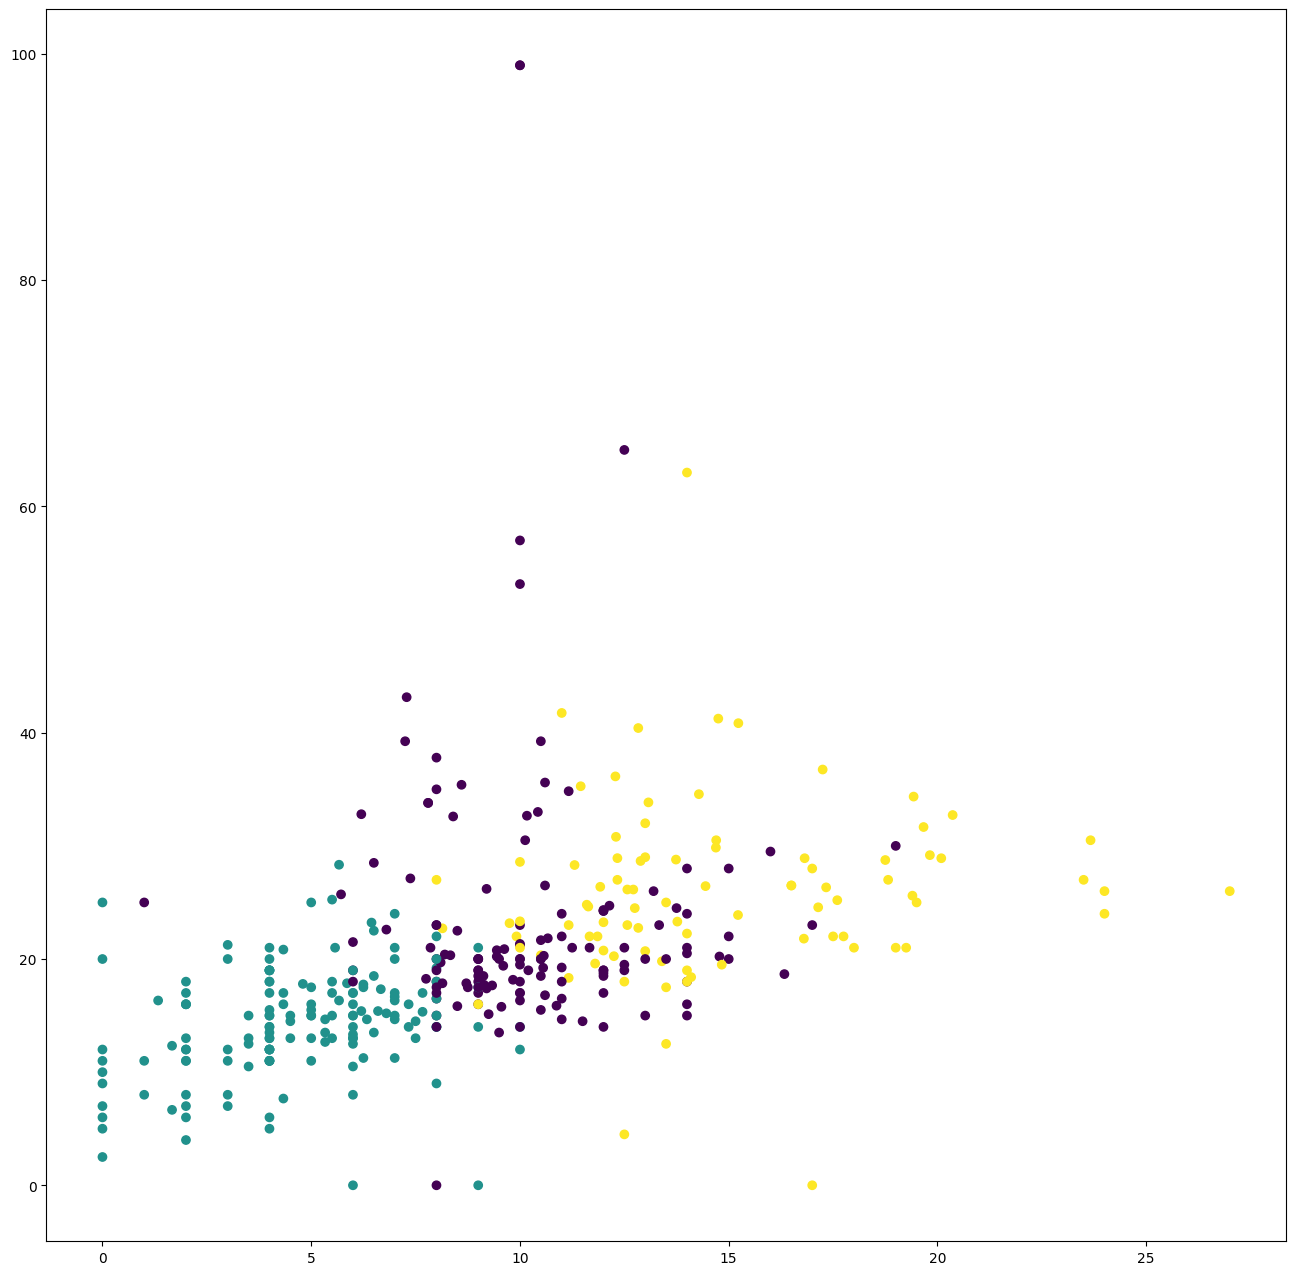

In [630]:
plt.figure(figsize=(16, 16))
plt.scatter(df_agg['points'], df_agg['minutes'], c=df_agg['prediction'])
